# No-show Appointments Project
 

In this exercise I will be exploring the relationship of patients that do not show to appointments and what factors contribute to this behavior. We expect to discover insights that were not clear previously.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* 'No-show' says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Dataset original source: https://www.kaggle.com/joniarroba/noshowappointments.


## I. Data Wrangling

In this section I am importing the packages i will be using, loading the data, and cleaning it.

In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
#loading CSV
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# A quick look
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
np.shape(df)

(110527, 14)

In [4]:
# checking for missing values and column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# checking for duplicated data
df.duplicated().sum()

0

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Data Cleaning

In [8]:
#creating a different version of my dataframe

df_v2 = df
df_v2.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [9]:
#renaming column no-show
df_v2.rename(columns={'No-show': 'No_show'}, inplace = True)


In [10]:
#droping uneeded columns

df_v2.drop(columns=['PatientId','AppointmentID'], inplace = True)


In [11]:
#checking the change
df_v2.columns
df_v2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Replacing no show with 0 for 'No' and 1 for 'yes'
df_v2.replace('No',0, inplace= True)
df_v2.replace('Yes',1, inplace = True)

In [13]:
#Checking the new dataframe
df_v2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [14]:
#changing data type to convert to date for "ScheduledDay" and "AppointmentDay"

df_v2['ScheduledDay'] = pd.to_datetime(df_v2['ScheduledDay'])
df_v2['AppointmentDay'] = pd.to_datetime(df_v2['AppointmentDay'])

df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 10.1+ MB


## II. Exploratory Data Analysis

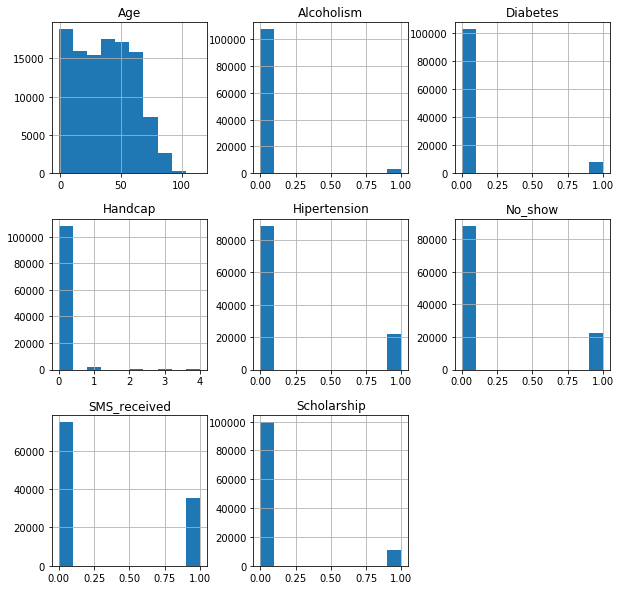

In [15]:
#histogram
df_v2.hist(figsize = (10,10));

In [16]:
df_v2.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [17]:
# Creating new column for the difference in dates from schedule day and appointment day
df_v2['diff_appt'] = df_v2['ScheduledDay'] - df_v2['AppointmentDay']

df_v2['diff_appt'].astype('timedelta64[D]', inplace = True)

df_v2['diff_appt_days'] = df['diff_appt'].apply(lambda x : x.days)

df_v2['diff_appt_days'].describe()

count    110527.000000
mean        -10.183702
std          15.254996
min        -179.000000
25%         -15.000000
50%          -4.000000
75%           0.000000
max           6.000000
Name: diff_appt_days, dtype: float64

In [18]:
# Max days is +6 therefore additional data cleaning 

df_v2.loc[df_v2['diff_appt_days']>0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,diff_appt,diff_appt_days
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,1,1 days 10:51:53,1
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,1 days 14:50:41,1
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,1,1 days 13:43:58,1
71533,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,6 days 13:49:20,6
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,1,1 days 06:50:57,1


In [19]:
#Drop bad records

df_v2.drop(index = [27033,55226,64175,71533,72362],axis = 0, inplace = True)

In [20]:
# Checking the drop
df_v2.loc[df_v2['diff_appt_days']>0].count()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
diff_appt         0
diff_appt_days    0
dtype: int64

In [21]:
# There are more number of show than no-shows
df_v2.groupby(df_v2['No_show']).sum()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,diff_appt_days
No_show,,,,,,,,
0,3333386,8283,18029,6513,2683,2006,25698,-772231
1,765769,2578,3772,1430,677,451,9784,-353353


In [22]:
df_v2.groupby(['No_show']).Age.mean()

No_show
0    37.790064
1    34.317872
Name: Age, dtype: float64

In [23]:

#df_v2.drop(['Age','diff_appt_days','No_show'], axis = 1).mean().plot(kind='bar')
df_v2.drop(['Age','diff_appt_days'], axis = 1).mean().groupby(df_v2['No_show']).plot(kind='bar')

plt.show()

In [24]:
df_v2.diff_appt_days.groupby(df_v2['SMS_received']).mean()

SMS_received
0    -6.007902
1   -19.016713
Name: diff_appt_days, dtype: float64

In [26]:
df_v2.SMS_received.groupby(df_v2['No_show']).mean()

No_show
0    0.291334
1    0.438469
Name: SMS_received, dtype: float64

In [27]:
df_v2.SMS_received.groupby(df_v2['No_show']).describe()

,count,mean,std,min,25%,50%,75%,max
No_show,,,,,,,,
0,88208.0,0.291334,0.454380,0.0,0.0,0.0,1.0,1.0
1,22314.0,0.438469,0.496211,0.0,0.0,0.0,1.0,1.0


In [28]:
corr = df_v2.corr()
corr

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,diff_appt_days
Age,1.000000,-0.092462,0.504600,0.292398,0.095813,0.078102,0.012639,-0.060311,-0.034822
Scholarship,-0.092462,1.000000,-0.019736,-0.024898,0.035020,-0.008554,0.001184,0.029167,0.030433
Hipertension,0.504600,-0.019736,1.000000,0.433083,0.087967,0.080163,-0.006282,-0.035660,0.017233
Diabetes,0.292398,-0.024898,0.433083,1.000000,0.018471,0.057579,-0.014559,-0.015156,0.027199
Alcoholism,0.095813,0.035020,0.087967,0.018471,1.000000,0.004668,-0.026153,-0.000180,0.038526
Handcap,0.078102,-0.008554,0.080163,0.057579,0.004668,1.000000,-0.024096,-0.006289,0.019773
SMS_received,0.012639,0.001184,-0.006282,-0.014559,-0.026153,-0.024096,1.000000,0.126505,-0.398131
No_show,-0.060311,0.029167,-0.035660,-0.015156,-0.000180,-0.006289,0.126505,1.000000,-0.186322
diff_appt_days,-0.034822,0.030433,0.017233,0.027199,0.038526,0.019773,-0.398131,-0.186322,1.000000


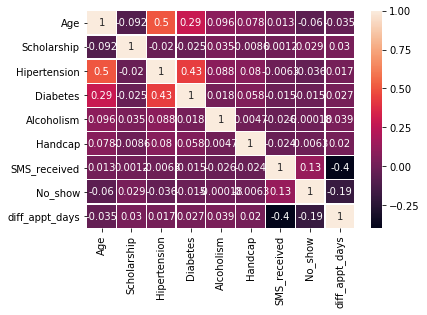

In [29]:
sns.heatmap(corr, annot=True, linewidths=.25)
plt.show()

In [30]:
df_v2.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No_show', 'diff_appt', 'diff_appt_days'],
      dtype='object')

## Questions

**Does Age have to do with No-Shows?**

The data shows that older patients tend to show up to their scheduled appointment more often, however the difference in age is minimal (37Yr show, and 34Yr no-show). 

In [31]:
df_v2.groupby('No_show').Age.mean()

No_show
0    37.790064
1    34.317872
Name: Age, dtype: float64

In [33]:
df_v2.groupby('No_show').Age.describe()

,count,mean,std,min,25%,50%,75%,max
No_show,,,,,,,,
0,88208.0,37.790064,23.338878,-1.0,18.0,38.0,56.0,115.0
1,22314.0,34.317872,21.965009,0.0,16.0,33.0,51.0,115.0


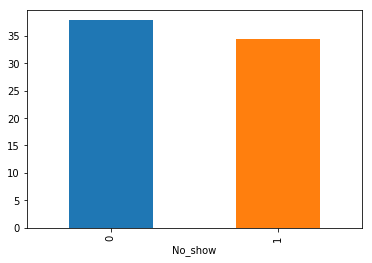

In [34]:
df_v2.groupby('No_show').Age.mean().plot(kind='bar');

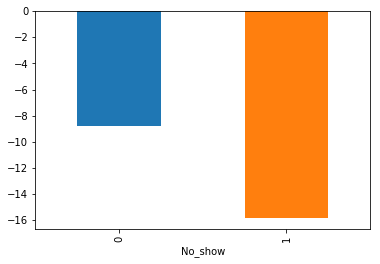

In [35]:
df_v2.groupby('No_show').diff_appt_days.mean().plot(kind='bar');

**Do People that receive SMS Messages show up more often?**

The data shows that people that receive sms messages are more likely to be a "No Show"

In [36]:
df_v2.groupby('No_show').SMS_received.mean()

No_show
0    0.291334
1    0.438469
Name: SMS_received, dtype: float64

In [37]:
df_v2['diff_appt'].describe()

count                       110522
mean     -10 days +06:50:38.092072
std        15 days 05:51:38.019538
min            -179 days +10:40:59
25%      -15 days +16:18:16.750000
50%       -4 days +12:36:19.500000
75%         0 days 08:18:25.750000
max                0 days 20:44:54
Name: diff_appt, dtype: object

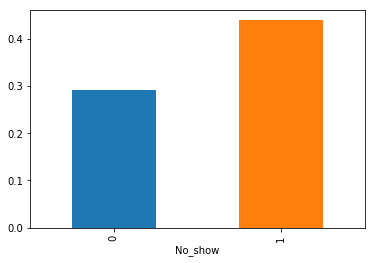

In [38]:
df_v2.groupby('No_show').SMS_received.mean().plot(kind='bar');

We see that the people that received SMS messages scheduled their appointment further out than the others, so it seems that patients receive SMS when onlyscheduling an appointmnet longer than 6 days

In [39]:
df_v2.diff_appt_days.groupby(df_v2['SMS_received']).describe()

,count,mean,std,min,25%,50%,75%,max
SMS_received,,,,,,,,
0,75040.0,-6.007902,12.333763,-179.0,-6.0,0.0,0.0,0.0
1,35482.0,-19.016713,16.978718,-179.0,-27.0,-14.0,-7.0,-3.0


**Does the time between appointment set and appointment day influeence the no-show?**

In average, the patients scheduled the appointments 10 days and 6 hours prior the appointment day. However the earlier the patient schedules the appointment, the more likely they are to be a "No show". 

In [40]:
df_v2['diff_appt'].describe()

count                       110522
mean     -10 days +06:50:38.092072
std        15 days 05:51:38.019538
min            -179 days +10:40:59
25%      -15 days +16:18:16.750000
50%       -4 days +12:36:19.500000
75%         0 days 08:18:25.750000
max                0 days 20:44:54
Name: diff_appt, dtype: object

In [41]:
df_v2.groupby(['No_show']).diff_appt.describe()

,count,mean,std,min,25%,50%,75%,max
No_show,,,,,,,,
0,88208,-9 days +17:03:13.775405,14 days 12:57:11.876227,-179 days +10:42:42,-12 days +08:34:05,-2 days +09:03:16,0 days 09:00:59.750000,0 days 20:44:54
1,22314,-16 days +15:36:39.492291,16 days 14:23:52.210830,-179 days +10:40:59,-23 days +08:14:55,-11 days +16:10:37.500000,-4 days +13:09:46.250000,0 days 19:24:38


**Do people with an illness or condition have higher or lower no-show?**

The condition that shows to have a relation to no-show is the Hipertension. Where patients with this illness tend to keep their appointments in contrast with the other illnesses listed.

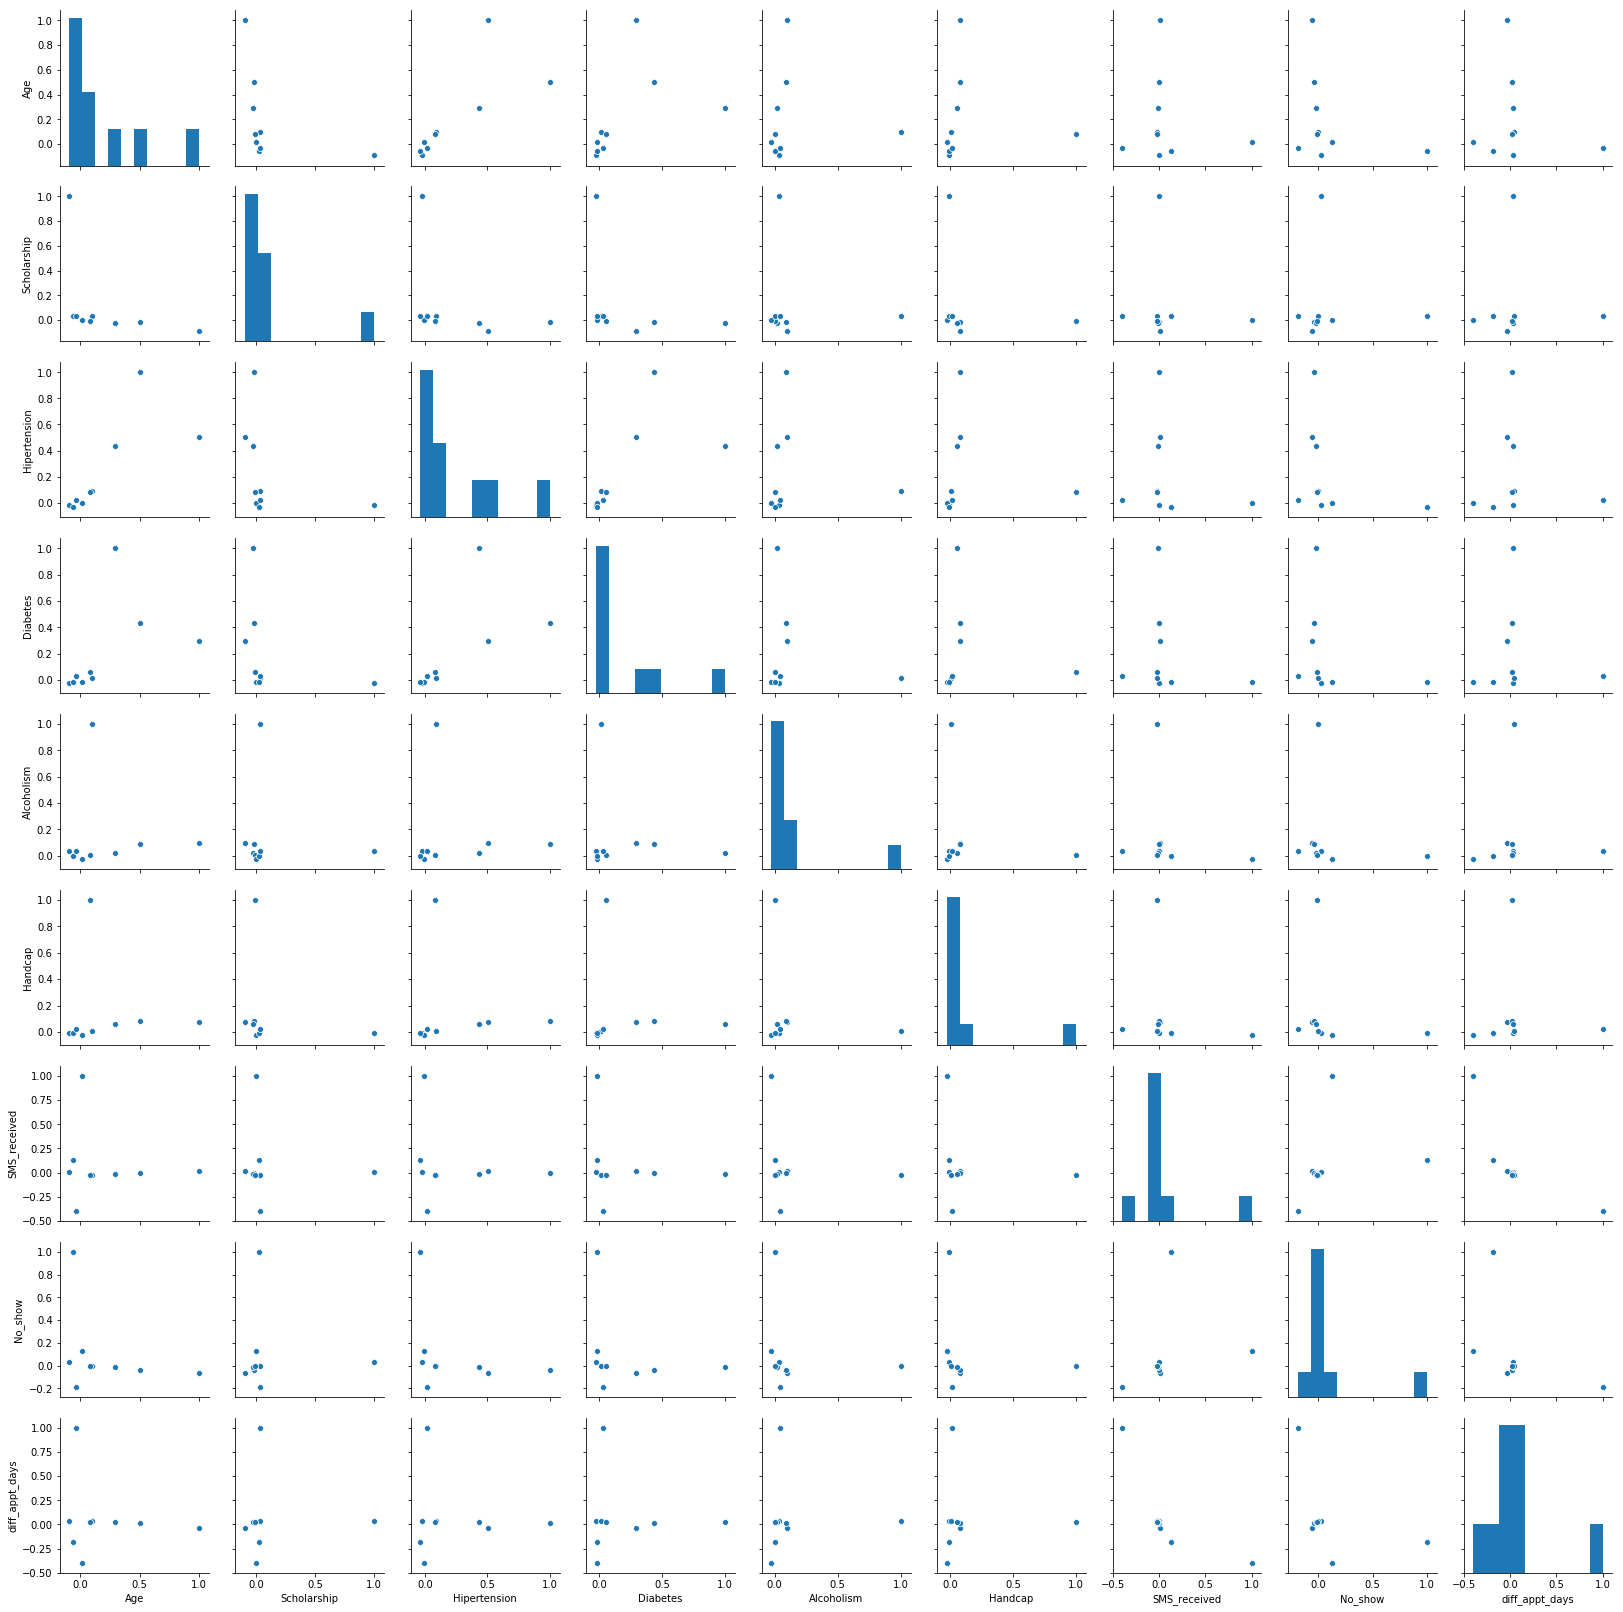

In [42]:

sns.pairplot(corr)
plt.show()

In [43]:
corr.No_show


Age              -0.060311
Scholarship       0.029167
Hipertension     -0.035660
Diabetes         -0.015156
Alcoholism       -0.000180
Handcap          -0.006289
SMS_received      0.126505
No_show           1.000000
diff_appt_days   -0.186322
Name: No_show, dtype: float64

In [44]:
df_v2.groupby(['No_show']).Hipertension.mean()

No_show
0    0.204392
1    0.169042
Name: Hipertension, dtype: float64